# Identifying Indicators of Heavy Traffic on I-94
We will be examining a dataset focusing on westbound traffic patterns on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). This dataset was compiled by John Hogue and is accessible from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

Our primary goal is to identify key indicators of heavy traffic on I-94. These indicators could include weather conditions, time of day, day of the week, or other relevant factors. By analyzing the data, we aim to uncover trends such as increased traffic during specific seasons or weather types.

## The I-94 Traffic Dataset
Let's explore our dataset a bit:

In [2]:
import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset comprises 48,204 rows and 9 columns, with no missing values. Each row represents traffic and weather information for a specific hour, spanning from October 2, 2012, to September 30, 2018.

The traffic data is collected from a station situated approximately halfway between Minneapolis and Saint Paul (see [the dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)). Given that the station monitors westbound traffic (vehicles traveling from east to west), the analysis will focus on traffic patterns specific to this direction and location. It's important to note that the findings may not be directly applicable to the entire I-94 highway.

## Analyzing Traffic Volume
We will begin our analysis by examining the distribution of the traffic_volume column.

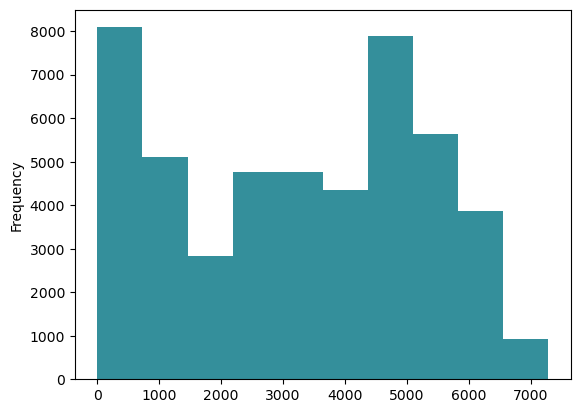

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
i_94['traffic_volume'].plot.hist(color='#348F9B')
plt.show()

In [8]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume on I-94 ranged from 0 to 7,280 vehicles, with an average of 3,260 cars.

Approximately 25% of the time, hourly traffic volume was limited to 1,193 cars or fewer, likely occurring during nighttime hours or periods of road construction. In contrast, about 25% of the time, traffic volume was four times higher, reaching 4,933 cars or more.

This observation suggests an interesting avenue for further analysis: comparing traffic patterns during daytime and nighttime hours.

## Traffic Volume: Day vs. Night

To analyze traffic patterns during different times of the day, we will divide the dataset into two segments:

* Daytime Data: Hours from 7 AM to 7 PM (12 hours)
* Nighttime Data: Hours from 7 PM to 7 AM (12 hours)

While this categorization may not be entirely definitive, it provides a solid foundation for comparing traffic volumes during day and night hours.

In [11]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


The substantial disparity in the number of rows between `daytime` and `nighttim`e data is primarily attributable to missing data points for certain hours. For example, rows 176 and 177 (`i_94.iloc[176:178]`) reveal a lack of data for hours 4 and 5.

## Traffic Volume: Day vs. Night (II)
Having separated the data into `daytime` and `nighttime` segments, we will now compare their traffic volume distributions using side-by-side histograms arranged in a grid format.

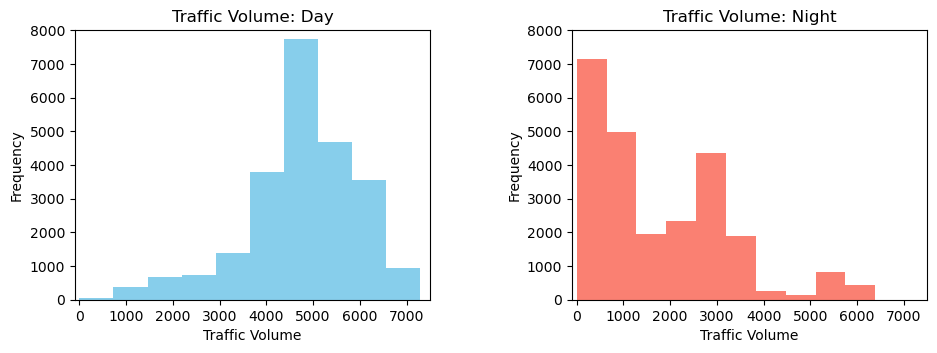

In [14]:
plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'], color='skyblue')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')


plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'], color='salmon')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplots_adjust(wspace=0.4)
plt.show()

In [15]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [16]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram illustrating the distribution of daytime traffic volume exhibits a left skew, indicating that a majority of the traffic volume values are relatively high. Specifically, 75% of the time, 4,252 or more cars pass the station per hour.

In contrast, the histogram representing nighttime traffic volume demonstrates a right skew, suggesting that most of the values are lower. Approximately 75% of the time, the hourly traffic volume during the night is less than 2,819 cars.

While there are still instances of over 5,000 cars per hour at night, the overall traffic flow is generally lighter. Given our primary objective of identifying indicators of heavy traffic, we will focus exclusively on the daytime data for further analysis.ard.

## Time Indicators

One potential indicator of heavy traffic is the time factor. Traffic volumes may vary across different months, days of the week, or times of the day/night.
To explore these temporal relationships, we will examine several line plots illustrating how traffic volume changes with respect to the following:

* Month
* Day of the week
* Time of day

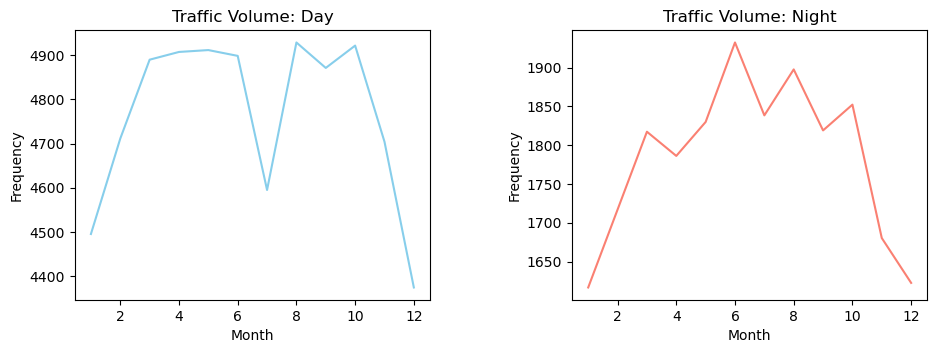

In [79]:
plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month')[['traffic_volume']].mean()
by_month['traffic_volume'].plot.line(color='skyblue')
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Month')

plt.subplot(1, 2, 2)
night['month'] = night['date_time'].dt.month
by_month = night.groupby('month')[['traffic_volume']].mean()
by_month['traffic_volume'].plot.line(color='salmon')
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Month')

plt.subplots_adjust(wspace=0.4)
plt.show()

Analyzing Anomalies in Traffic Patterns: July and June
While our previous analysis identified general trends in traffic volume, two specific months exhibited notable deviations:

* July: Despite being a warm month, traffic volume consistently appears lower in July compared to other warm months.
* June: Nighttime traffic volume in June shows a significant increase, deviating from the typical pattern.

To understand these anomalies, we will conduct a more in-depth analysis of year-over-year traffic volume changes in July and explore potential underlying factors contributing to both the reduced July traffic and the increased June nighttime traffic.

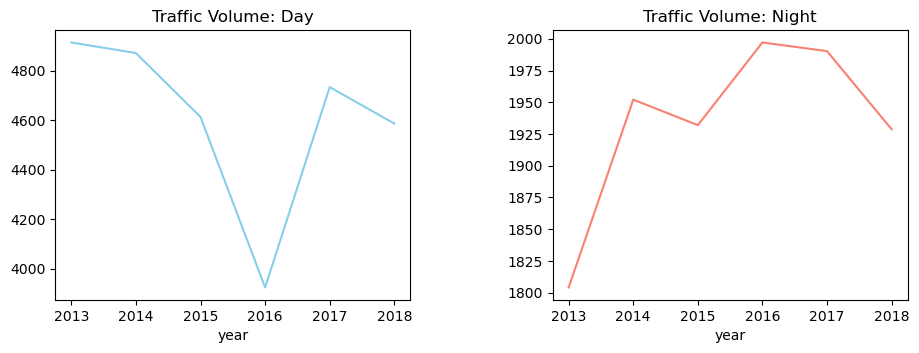

In [87]:
plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year')['traffic_volume'].mean().plot.line(color='skyblue')
plt.title('Traffic Volume: Day')

plt.subplot(1, 2, 2)
night['year'] = night['date_time'].dt.year
only_june = night[night['month'] == 6]
only_june.groupby('year')['traffic_volume'].mean().plot.line(color='salmon')
plt.title('Traffic Volume: Night')

plt.subplots_adjust(wspace=0.4)
plt.show()

While July generally experiences heavy traffic similar to other warm months, 2016 stands out with a notable decline in traffic volume. One likely reason for this anomaly is road construction, as highlighted by a [2016 news article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696).

Additionally, seasonal construction and roadwork typically begin in June along [I-94](https://roadnow.com/i94/constructions.php). These projects often result in lane reductions during daytime hours, which shifts much of the heavier traffic to nighttime. This shift explains the observed increase in night traffic in June as drivers adjust their schedules to avoid daytime congestion caused by the construction.

From this analysis, we can infer that warm months usually exhibit higher traffic volumes compared to cold months. On average, a warm month’s daytime traffic can reach around 5,000 cars per hour, with potential nighttime spikes in June due to construction-related shifts.

## Time Indicators (II)
To delve deeper into traffic variations, we will now analyze a more granular indicator: the day number.

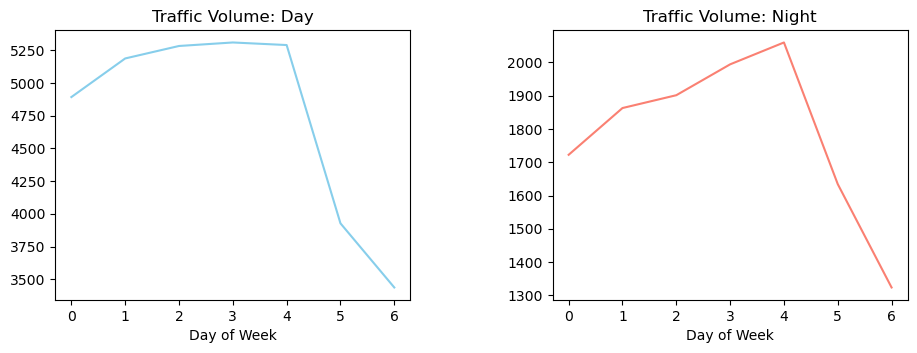

In [92]:
plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek')[['traffic_volume']].mean()
by_dayofweek['traffic_volume'].plot.line(color='skyblue')
plt.title('Traffic Volume: Day')
plt.xlabel('Day of Week')

plt.subplot(1, 2, 2)
night['dayofweek'] = night['date_time'].dt.dayofweek
by_nightofweek = night.groupby('dayofweek')[['traffic_volume']].mean()
by_nightofweek['traffic_volume'].plot.line(color='salmon')
plt.title('Traffic Volume: Night')
plt.xlabel('Day of Week')

plt.subplots_adjust(wspace=0.4)
plt.show()

Traffic volume is notably higher on weekdays (Monday to Friday) compared to weekends. Excluding Monday, we observe daytime traffic volumes exceeding 5,000 vehicles and nighttime volumes exceeding 2,000 vehicles, but only during weekdays. Conversely, traffic is lighter on weekends, with volumes typically below 4,000 cars during the day and under 1,500 at night.

## Time Indicators (III)
To examine traffic patterns based on time of day/night, we will analyze the average traffic volumes for weekdays and weekends separately. This approach will help mitigate the potential impact of lower weekend traffic on overall averages.

In [109]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour')[['traffic_volume']].mean()
by_hour_weekend = weekend.groupby('hour')[['traffic_volume']].mean()

print("The average traffic volumes for weekdays_day:", by_hour_business['traffic_volume'])
print('\n')
print("The average traffic volumes for weekend_day:", by_hour_weekend['traffic_volume'])

The average traffic volumes for weekdays_day: hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


The average traffic volumes for weekend_day: hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


In [111]:
night['hour'] = night['date_time'].dt.hour
bussiness_night = night.copy()[night['dayofweek'] <= 4] 
weekend_night = night.copy()[night['dayofweek'] >= 5] 
by_hour_business_night = bussiness_night.groupby('hour')[['traffic_volume']].mean()
by_hour_weekend_night = weekend_night.groupby('hour')[['traffic_volume']].mean()

print("The average traffic volumes for weekdays_night:", by_hour_business_night['traffic_volume'])
print('\n')
print("The average traffic volumes for weekend_night:", by_hour_weekend_night['traffic_volume'])

The average traffic volumes for weekdays_night: hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64


The average traffic volumes for weekend_night: hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


We'll now generate a line plot for the time of day.

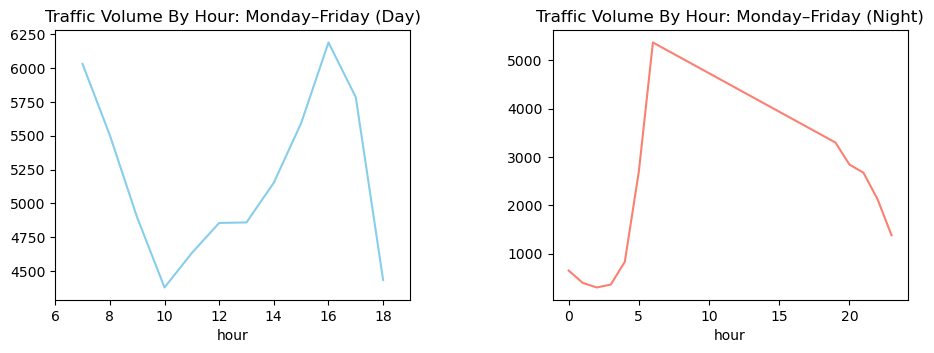

In [165]:
plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line(color='skyblue')
plt.title('Traffic Volume By Hour: Monday–Friday (Day)')
plt.xlim(6, 19)
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
by_hour_business_night['traffic_volume'].plot.line(color='salmon')
plt.title('Traffic Volume By Hour: Monday–Friday (Night)')
plt.xticks(rotation=0)

plt.subplots_adjust(wspace=0.4)
plt.show()

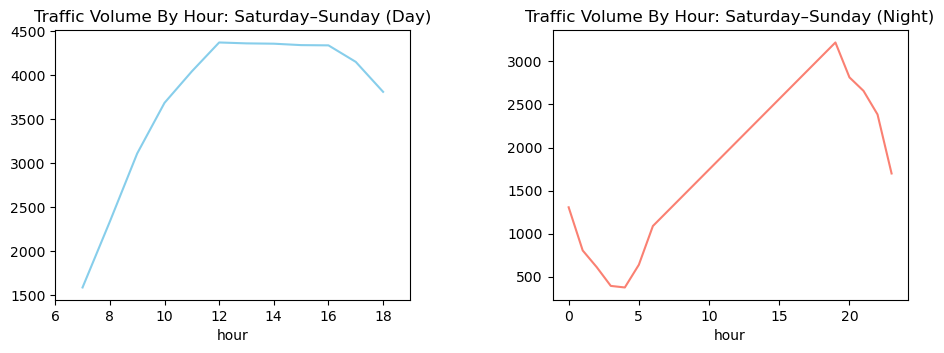

In [167]:
plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
by_hour_weekend['traffic_volume'].plot.line(color='skyblue')
plt.title('Traffic Volume By Hour: Saturday–Sunday (Day)')
plt.xlim(6, 19)
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
by_hour_weekend_night['traffic_volume'].plot.line(color='salmon')
plt.title('Traffic Volume By Hour: Saturday–Sunday (Night)')
plt.xticks(rotation=0)

plt.subplots_adjust(wspace=0.4)
plt.show()

At every hour of the day, traffic volume is generally higher on weekdays compared to weekends. As anticipated, rush hours occur around 7 AM and 4 PM, corresponding to the peak commuting times when most people travel to and from work. During these rush periods, we observe traffic volumes exceeding 6,000 cars.

Summary of Time-Related Heavy Traffic Indicators

To summarize, we have identified the following time-related indicators of heavy traffic:

* Seasonal Patterns: Traffic is typically heavier during warm months (March to October) compared to cold months (November to February).
* Weekday vs. Weekend: Traffic is generally heavier on business days compared to weekends.
* Rush Hours: On business days, rush hours occur around 7 AM and 4 PM.

## Weather Indicators

We will now explore weather as a potential indicator of heavy traffic. The dataset provides several relevant weather-related columns: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, and `weather_description`.

Since some of these columns are numerical, we will begin by calculating their correlation coefficients with the `traffic_volume` column.

In [34]:
day_time = day.drop(['weather_description', 'weather_main', 'holiday'], axis=1)
night_time = night.drop(['weather_description', 'weather_main', 'holiday'], axis=1)

In [35]:
day_time.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
date_time        -0.007153
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

In [169]:
night_time.corr()['traffic_volume']

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
date_time         0.019165
traffic_volume    1.000000
month             0.001342
Name: traffic_volume, dtype: float64

`Temperature` demonstrates the strongest correlation with `traffic_volume`, exhibiting a value of +0.13 (daytime) and +0.09 (nighttime). The other relevant weather columns (rain_1h, snow_1h, clouds_all) do not exhibit significant correlations with traffic_volume.

To visualize the relationship between `temp` and `traffic volume`, we will create a scatter plot.

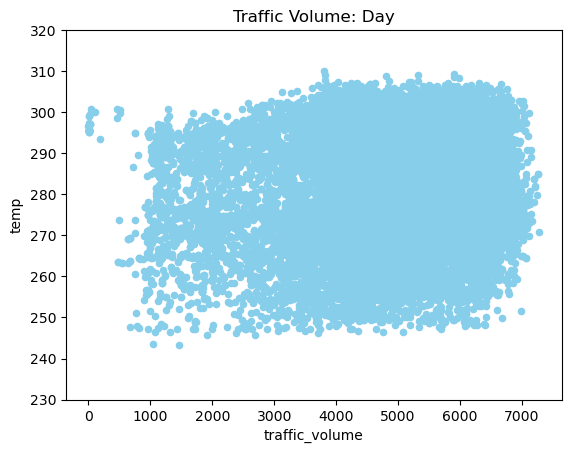

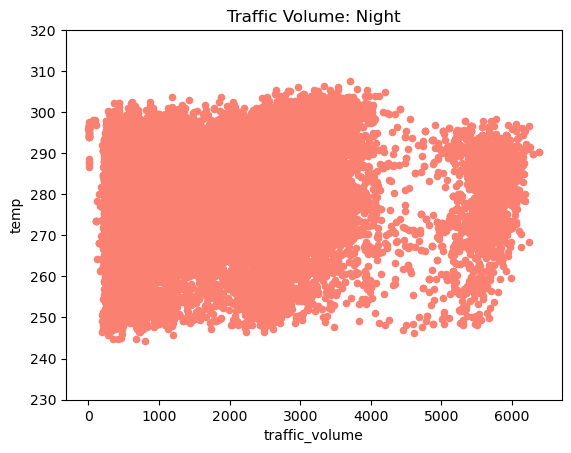

In [210]:
day.plot.scatter('traffic_volume', 'temp', color='skyblue')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.title('Traffic Volume: Day')

night.plot.scatter('traffic_volume', 'temp', color='salmon')
plt.ylim(230, 320)
plt.title('Traffic Volume: Night')

plt.show()

Based on the correlation analysis and scatter plot, temperature does not appear to be a strong indicator of heavy traffic.

## Weather Types

We will now shift our focus to the remaining weather-related columns: `weather_main` and `weather_description`.

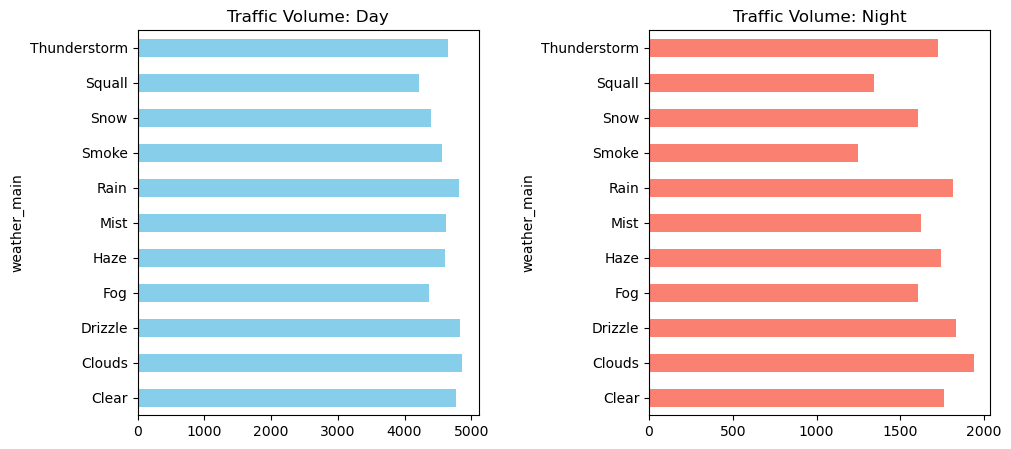

In [222]:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
by_weather_main = day.groupby('weather_main')[['traffic_volume']].mean()
by_weather_main['traffic_volume'].plot.barh(color='skyblue')
plt.title('Traffic Volume: Day')

plt.subplot(1, 2, 2)
by_weather_main = night.groupby('weather_main')[['traffic_volume']].mean()
by_weather_main['traffic_volume'].plot.barh(color='salmon')
plt.title('Traffic Volume: Night')

plt.subplots_adjust(wspace=0.5)
plt.show()

Upon analyzing the `weather_main` column, it appears that no specific weather type consistently results in traffic volumes exceeding 5,000 cars and 2000 at night. This makes identifying a definitive weather-based heavy traffic indicator more challenging.

To gain further insights, we will also group the data by the `weather_description` column, which offers a more granular classification of weather conditions.

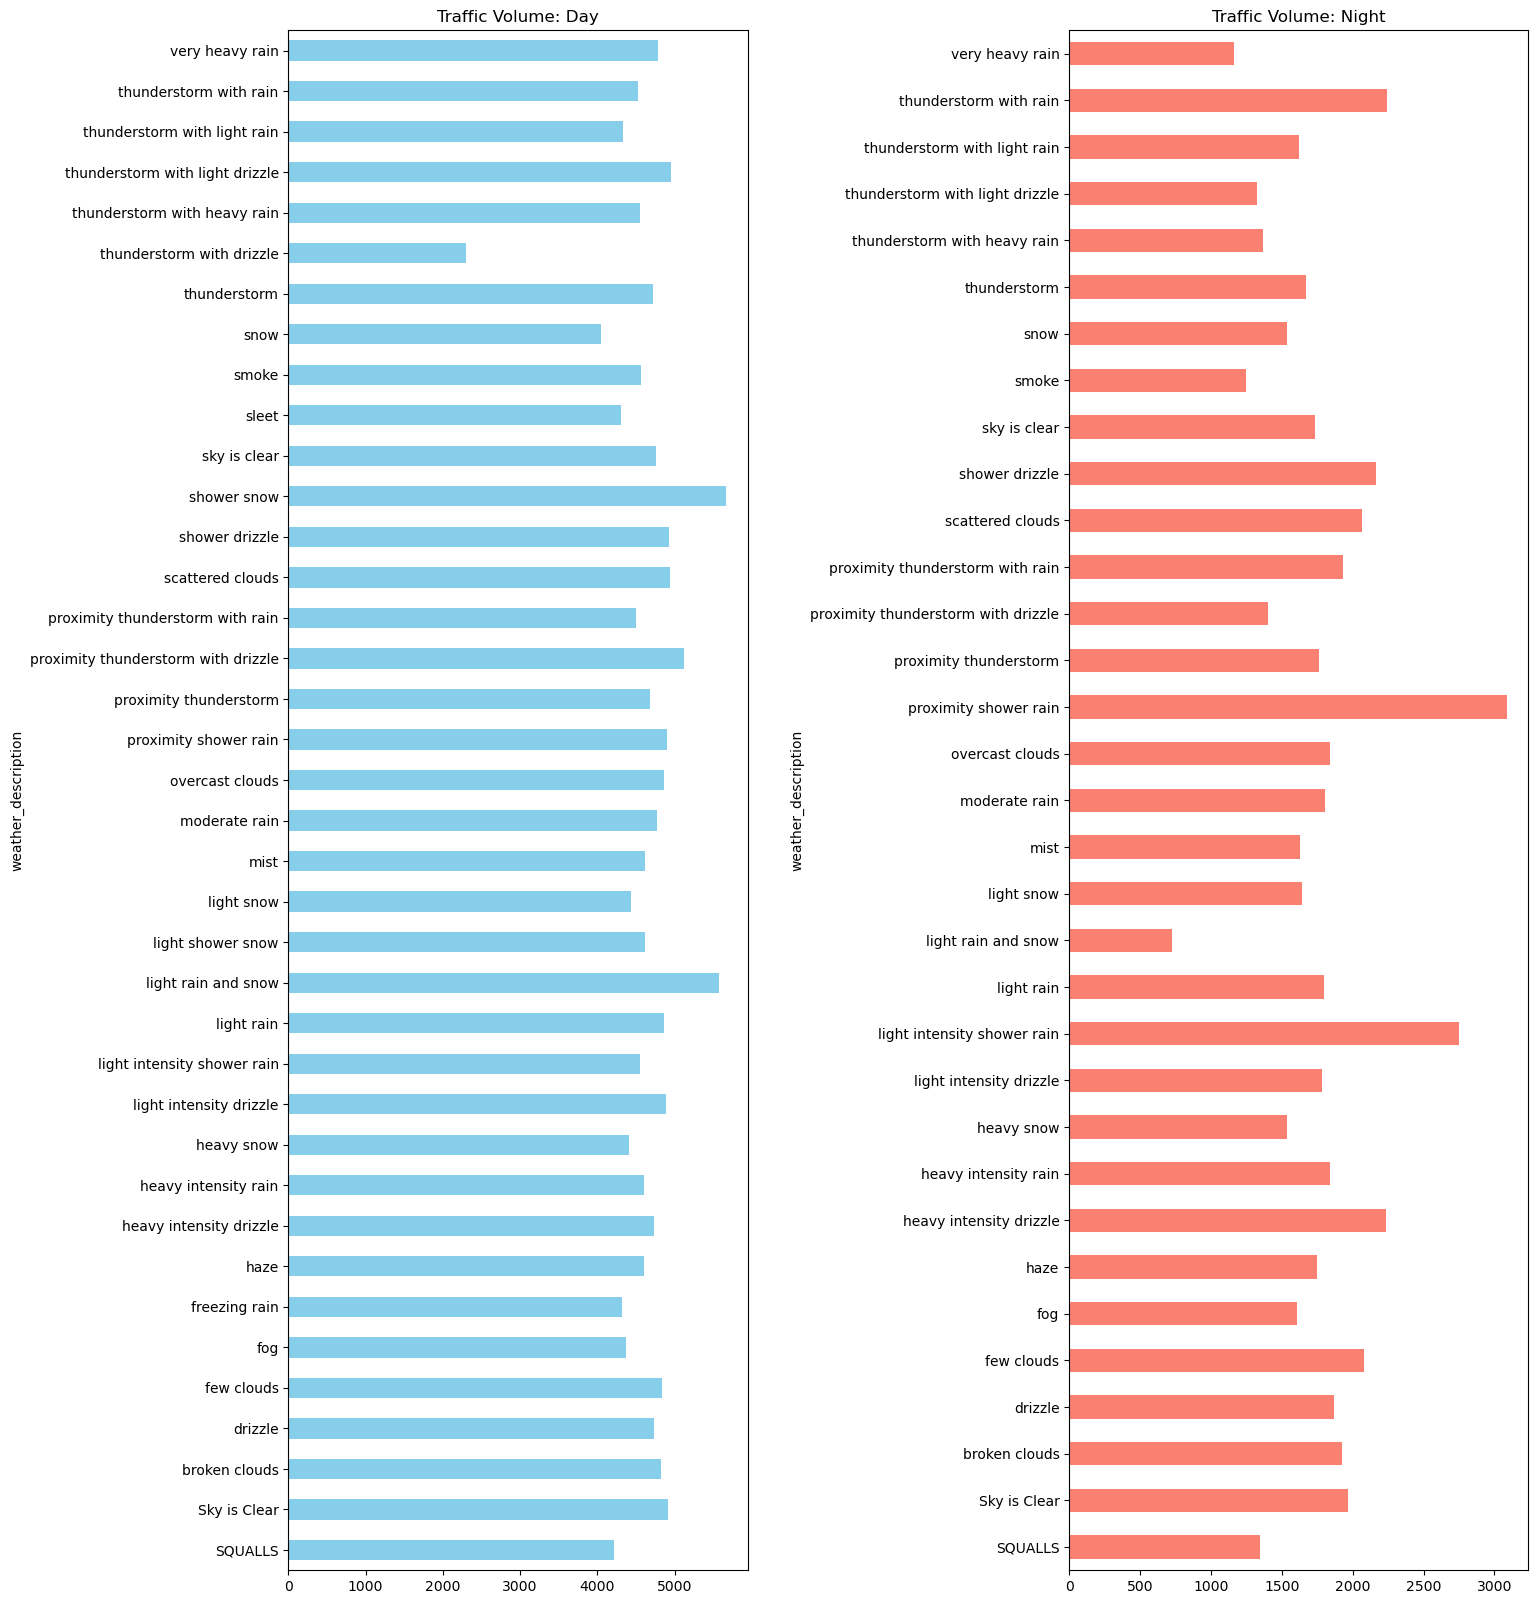

In [285]:
plt.figure(figsize=(16, 20))

plt.subplot(1, 2, 1)
by_weather_description = day.groupby('weather_description')[['traffic_volume']].mean()
by_weather_description['traffic_volume'].plot.barh(color='skyblue')
plt.title('Traffic Volume: Day')

plt.subplot(1, 2, 2)
by_weather_description = night.groupby('weather_description')[['traffic_volume']].mean()
by_weather_description['traffic_volume'].plot.barh(color='salmon')
plt.title('Traffic Volume: Night')

plt.subplots_adjust(wspace=0.7)
plt.show()

Our analysis indicates that three weather types are associated with traffic volumes exceeding 5,000 cars and 2000 at night:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

While these weather conditions are considered adverse, they may not necessarily be the most severe. One potential explanation for the higher traffic volumes under these conditions is that people might opt to drive their cars instead of walking or biking when the weather is inclement.

## Conclusion
In this project, we sought to identify key indicators of heavy traffic on the I-94 Interstate highway. Our analysis yielded two primary categories of indicators:

Time-Related Indicators:

* Seasonal Patterns: Traffic is generally heavier during warm months (March to October) compared to cold months (November to February).
* Weekday vs. Weekend: Traffic is typically heavier on business days compared to weekends.
* Rush Hours: On business days, rush hours occur around 7 AM and 4 PM.

Weather-Related Indicators:

* Precipitation: Shower snow, light rain and snow, and proximity thunderstorms with drizzle are associated with higher traffic volumes.
* These findings provide valuable insights into factors influencing traffic congestion on I-94 and can inform strategies for managing and  mitigating traffic-related issues.